<a href="https://colab.research.google.com/github/P-Saha/16_CHL5230-F23_Phase-2_Datathon-3/blob/main/16_CHL5230_F23_Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 2 Project & Datathon 3

We will be using the CHL 5230 data set entiled `Diabetes Study File 10K Dec 14 2017`

In [ ]:
import random
random.seed(16)

# Import Libraries

In [ ]:
pip install --upgrade category_encoders #install this

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

warnings.filterwarnings('ignore')

# Import Data

Data will have to imported using the following code since it is private and cannot be put into a public repository

**Use this code if you are uploading the data from a Google Drive folder**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#path = "/content/drive/MyDrive/Colab Notebooks/Folder where file exists/Diabetes Study File 10K Dec 14 2017.xlsx"  #Ensure this path matches where the data is stored
#df = pd.read_excel(path)

**Use this code if you are uploading the data from your local device**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Diabetes Study File 10K Dec 14 2017.xlsx to Diabetes Study File 10K Dec 14 2017.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Diabetes Study File 10K Dec 14 2017.xlsx']))

# Understanding the Data

The following code will allow us to better understand the dataset and the type of features there are

In [ ]:
df.head()

Age_at_Exam    sBP   sBP_Date        BMI   BMI_Date   LDL   LDL_Date   HDL  \
0           65  126.0 2013-06-11  31.000000 2013-06-11  1.66 2013-06-14  1.11   
1           62  135.0 2014-06-19  25.846483 2014-10-17  2.49 2014-05-28  1.37   
2           63  133.0 2012-07-31  30.900000 2011-12-01  1.65 2012-06-01   NaN   
3           51  136.0 2014-01-06  56.710775 2014-01-06  2.80 2014-01-14  1.94   
4           40  123.0 2015-06-12  33.067867 2015-06-12  2.48 2015-06-24  1.17   

    HDL_Date  A1c  ... leastO(A1c_Date)  leastO(DM_OnsetDate)  \
0 2013-06-14  5.4  ...              NaN                   NaN   
1 2014-05-28  5.8  ...              NaN                   NaN   
2        NaT  6.1  ...              NaN                   NaN   
3 2014-01-14  6.0  ...              NaN                   NaN   
4 2015-06-24  5.8  ...              NaN                   NaN   

  leastO(FBS_Date)  LeastOfAll A1C_BEF_DM  FBS_BEF_DM        Patient_ID  \
0              NaN         NaN        NaN         NaN  4001000000255903   
1              NaN         NaN        NaN         NaN  4001000000256456   
2              NaN         NaN        NaN         NaN  1001000000000054   
3              NaN         NaN        NaN         NaN  4001000000259496   
4              NaN         NaN        NaN         NaN  4001000000262094   

  DM_Onset_Revised  DM_Onset_Revised_1YrPrior DIABETES  
0              NaT                        NaT       No  
1              NaT                        NaT       No  
2              NaT                        NaT       No  
3              NaT                        NaT       No  
4              NaT                        NaT       No  

[5 rows x 43 columns]

In [ ]:
df.dtypes

Age_at_Exam                                         int64
sBP                                               float64
sBP_Date                                   datetime64[ns]
BMI                                               float64
BMI_Date                                   datetime64[ns]
LDL                                               float64
LDL_Date                                   datetime64[ns]
HDL                                               float64
HDL_Date                                   datetime64[ns]
A1c                                               float64
A1c_Date                                   datetime64[ns]
TG                                                float64
TG_Date                                    datetime64[ns]
FBS                                               float64
FBS_Date                                   datetime64[ns]
FBS>DM                                              int64
Total_Cholesterol                                 float64
Total_Choleste

In [ ]:
print(df.shape)
print(df.columns)
print(df.describe())
print(df.isnull().sum())

(10000, 43)
Index(['Age_at_Exam', 'sBP', 'sBP_Date', 'BMI', 'BMI_Date', 'LDL', 'LDL_Date',
       'HDL', 'HDL_Date', 'A1c', 'A1c_Date', 'TG', 'TG_Date', 'FBS',
       'FBS_Date', 'FBS>DM', 'Total_Cholesterol', 'Total_Cholesterol_Lab_Date',
       'Diabetes', 'DM_OnsetDate', 'Depression', 'Depression_OnsetDate', 'HTN',
       'HTN_OnsetDate', 'OA', 'OA_OnsetDate', 'COPD', 'COPD_Date',
       'Hypertension_Medications', 'Hypertension_Medications_First_Instance',
       'Corticosteroids', 'Corticosteroids_first_instance', 'Sex',
       'leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
       'LeastOfAll', 'A1C_BEF_DM', 'FBS_BEF_DM', 'Patient_ID',
       'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior', 'DIABETES'],
      dtype='object')
        Age_at_Exam          sBP           BMI          LDL          HDL  \
count  10000.000000  9996.000000  10000.000000  9939.000000  9928.000000   
mean      63.197600   130.394358     30.415909     2.540959     1.321803   
std       13.12

# Data Pre-Processesing

First make all `date` columns to pandas `datetype`

In [ ]:
df[['sBP_Date', 'BMI_Date','LDL_Date','HDL_Date','A1c_Date','TG_Date','FBS_Date','Total_Cholesterol_Lab_Date','DM_OnsetDate','Depression_OnsetDate',
    'Hypertension_Medications_First_Instance','Corticosteroids_first_instance','DM_Onset_Revised','DM_Onset_Revised_1YrPrior']] = df[['sBP_Date', 'BMI_Date','LDL_Date','HDL_Date','A1c_Date','TG_Date','FBS_Date','Total_Cholesterol_Lab_Date','DM_OnsetDate','Depression_OnsetDate',
    'Hypertension_Medications_First_Instance','Corticosteroids_first_instance','DM_Onset_Revised','DM_Onset_Revised_1YrPrior']].astype('datetime64')

In [ ]:
df.dtypes

Age_at_Exam                                         int64
sBP                                               float64
sBP_Date                                   datetime64[ns]
BMI                                               float64
BMI_Date                                   datetime64[ns]
LDL                                               float64
LDL_Date                                   datetime64[ns]
HDL                                               float64
HDL_Date                                   datetime64[ns]
A1c                                               float64
A1c_Date                                   datetime64[ns]
TG                                                float64
TG_Date                                    datetime64[ns]
FBS                                               float64
FBS_Date                                   datetime64[ns]
FBS>DM                                              int64
Total_Cholesterol                                 float64
Total_Choleste

For this part of our analysis we will only be looking at the biomakers, thresholds for diagnosis, comorbidities, and the outcome itself

In [ ]:
dropped_columns = ['Age_at_Exam',  'sBP_Date', 'BMI_Date', 'LDL_Date',
        'HDL_Date',  'A1c_Date',  'TG_Date',
       'FBS_Date', 'FBS>DM',  'Total_Cholesterol_Lab_Date',
       'DIABETES', 'DM_OnsetDate', 'Depression', 'Depression_OnsetDate', 'HTN',
       'HTN_OnsetDate', 'OA', 'OA_OnsetDate', 'COPD', 'COPD_Date',
       'Hypertension_Medications', 'Hypertension_Medications_First_Instance',
       'Corticosteroids', 'Corticosteroids_first_instance', 'Sex',
       'leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
       'LeastOfAll', 'A1C_BEF_DM', 'FBS_BEF_DM', 'Patient_ID',
       'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior']

diagnosis = ['Diabetes', 'Depression', 'OA', 'HTN', 'COPD']

ogdf = df

df = df.drop(columns=dropped_columns, axis=1)

dfDiag = ogdf.drop(columns=np.setdiff1d(dropped_columns, diagnosis), axis=1, inplace=False)

# Data Visualization

In [ ]:
print(df.columns)
print(df.dtypes)
print(df.describe())

Index(['sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'Total_Cholesterol',
       'Diabetes'],
      dtype='object')
sBP                  float64
BMI                  float64
LDL                  float64
HDL                  float64
A1c                  float64
TG                   float64
FBS                  float64
Total_Cholesterol    float64
Diabetes               int64
dtype: object
               sBP           BMI          LDL          HDL           A1c  \
count  9996.000000  10000.000000  9939.000000  9928.000000  10000.000000   
mean    130.394358     30.415909     2.540959     1.321803      6.266754   
std      17.018794      6.831567     0.949213     0.402217      0.954380   
min      60.000000      1.376352     0.070000     0.160000      3.400000   
25%     120.000000     25.898654     1.820000     1.040000      5.700000   
50%     130.000000     29.300000     2.400000     1.250000      6.000000   
75%     140.000000     33.790000     3.160000     1.540000      6.600000   

In [ ]:
categorical_columns = "Diabetes"
target_column = "Diabetes"
numerical_columns = ['sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'Total_Cholesterol']

In [ ]:
# Create an interactive box plot for the 'Age' feature
for j in diagnosis:
  for i in numerical_columns:
    fig_box = px.box(dfDiag, x=j,y = i, title='Box Plot of biomarker by '+j, color=j, color_discrete_sequence=['#0d7b94', '#82153d'])

  # Customizing the layout and theme
    fig_box.update_layout(template="plotly_white")

  # Show the plot
    fig_box.show()

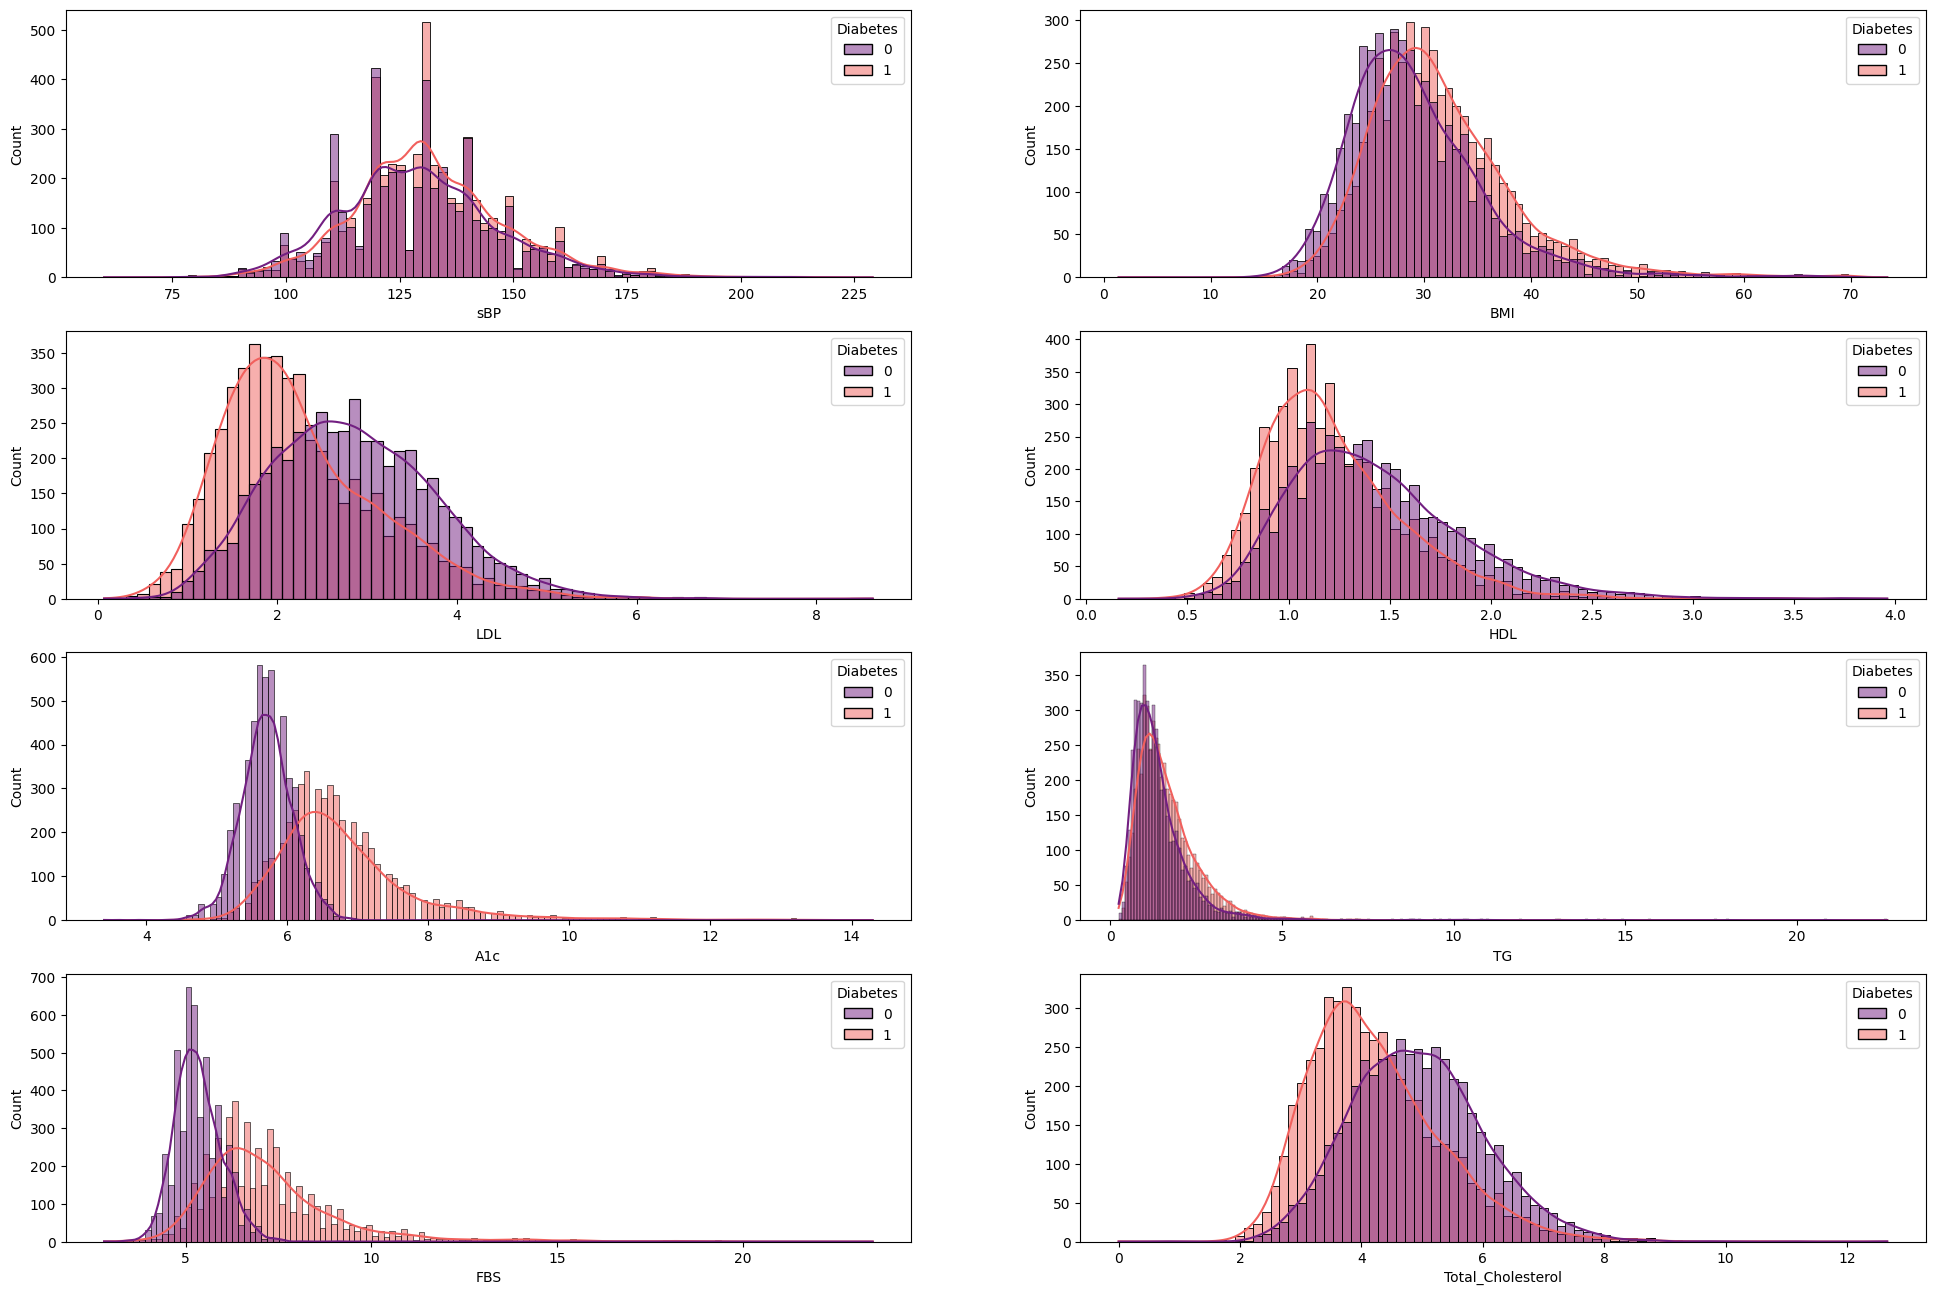

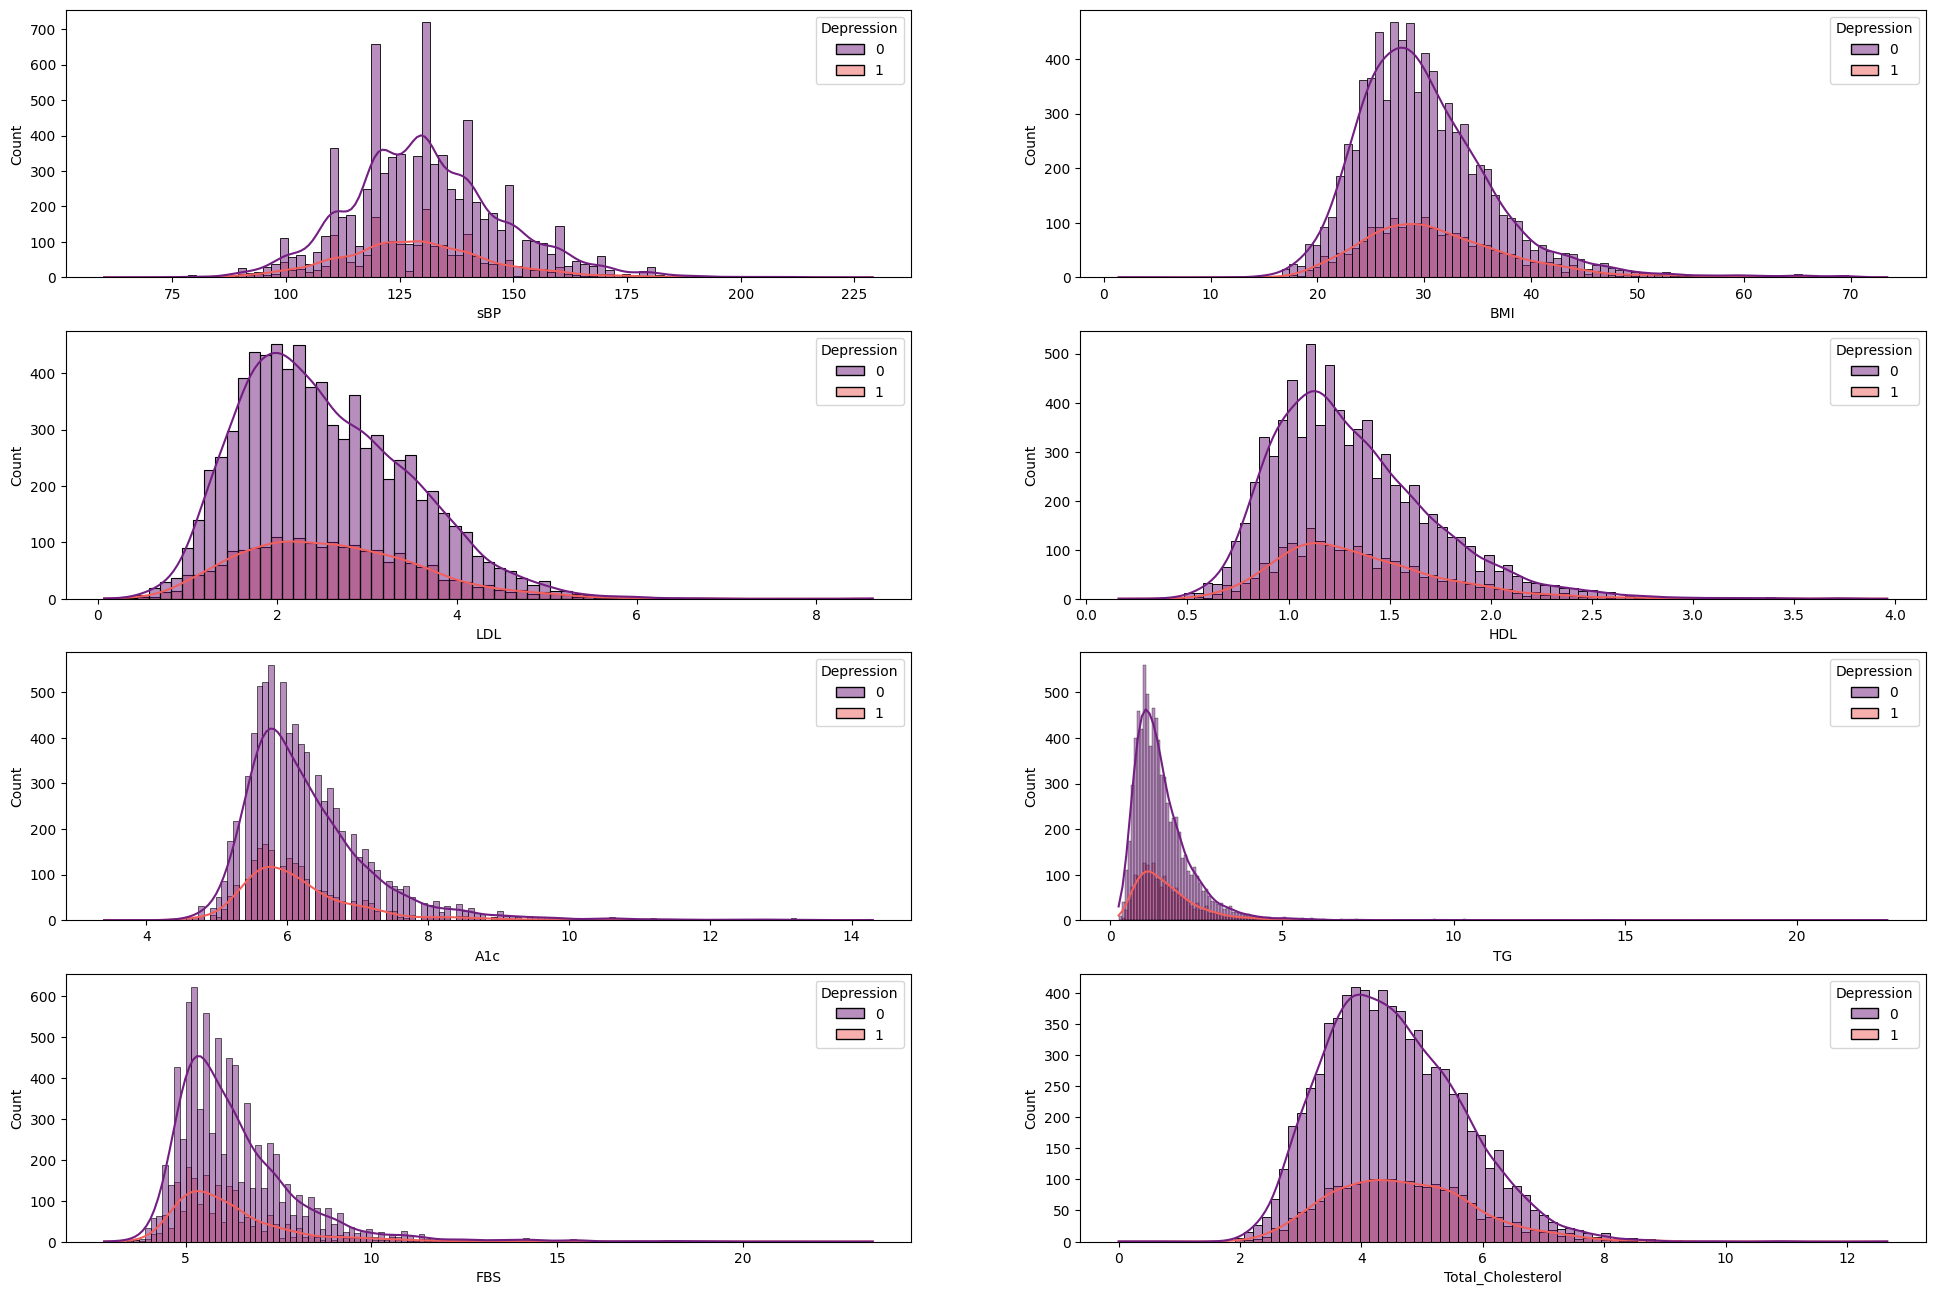

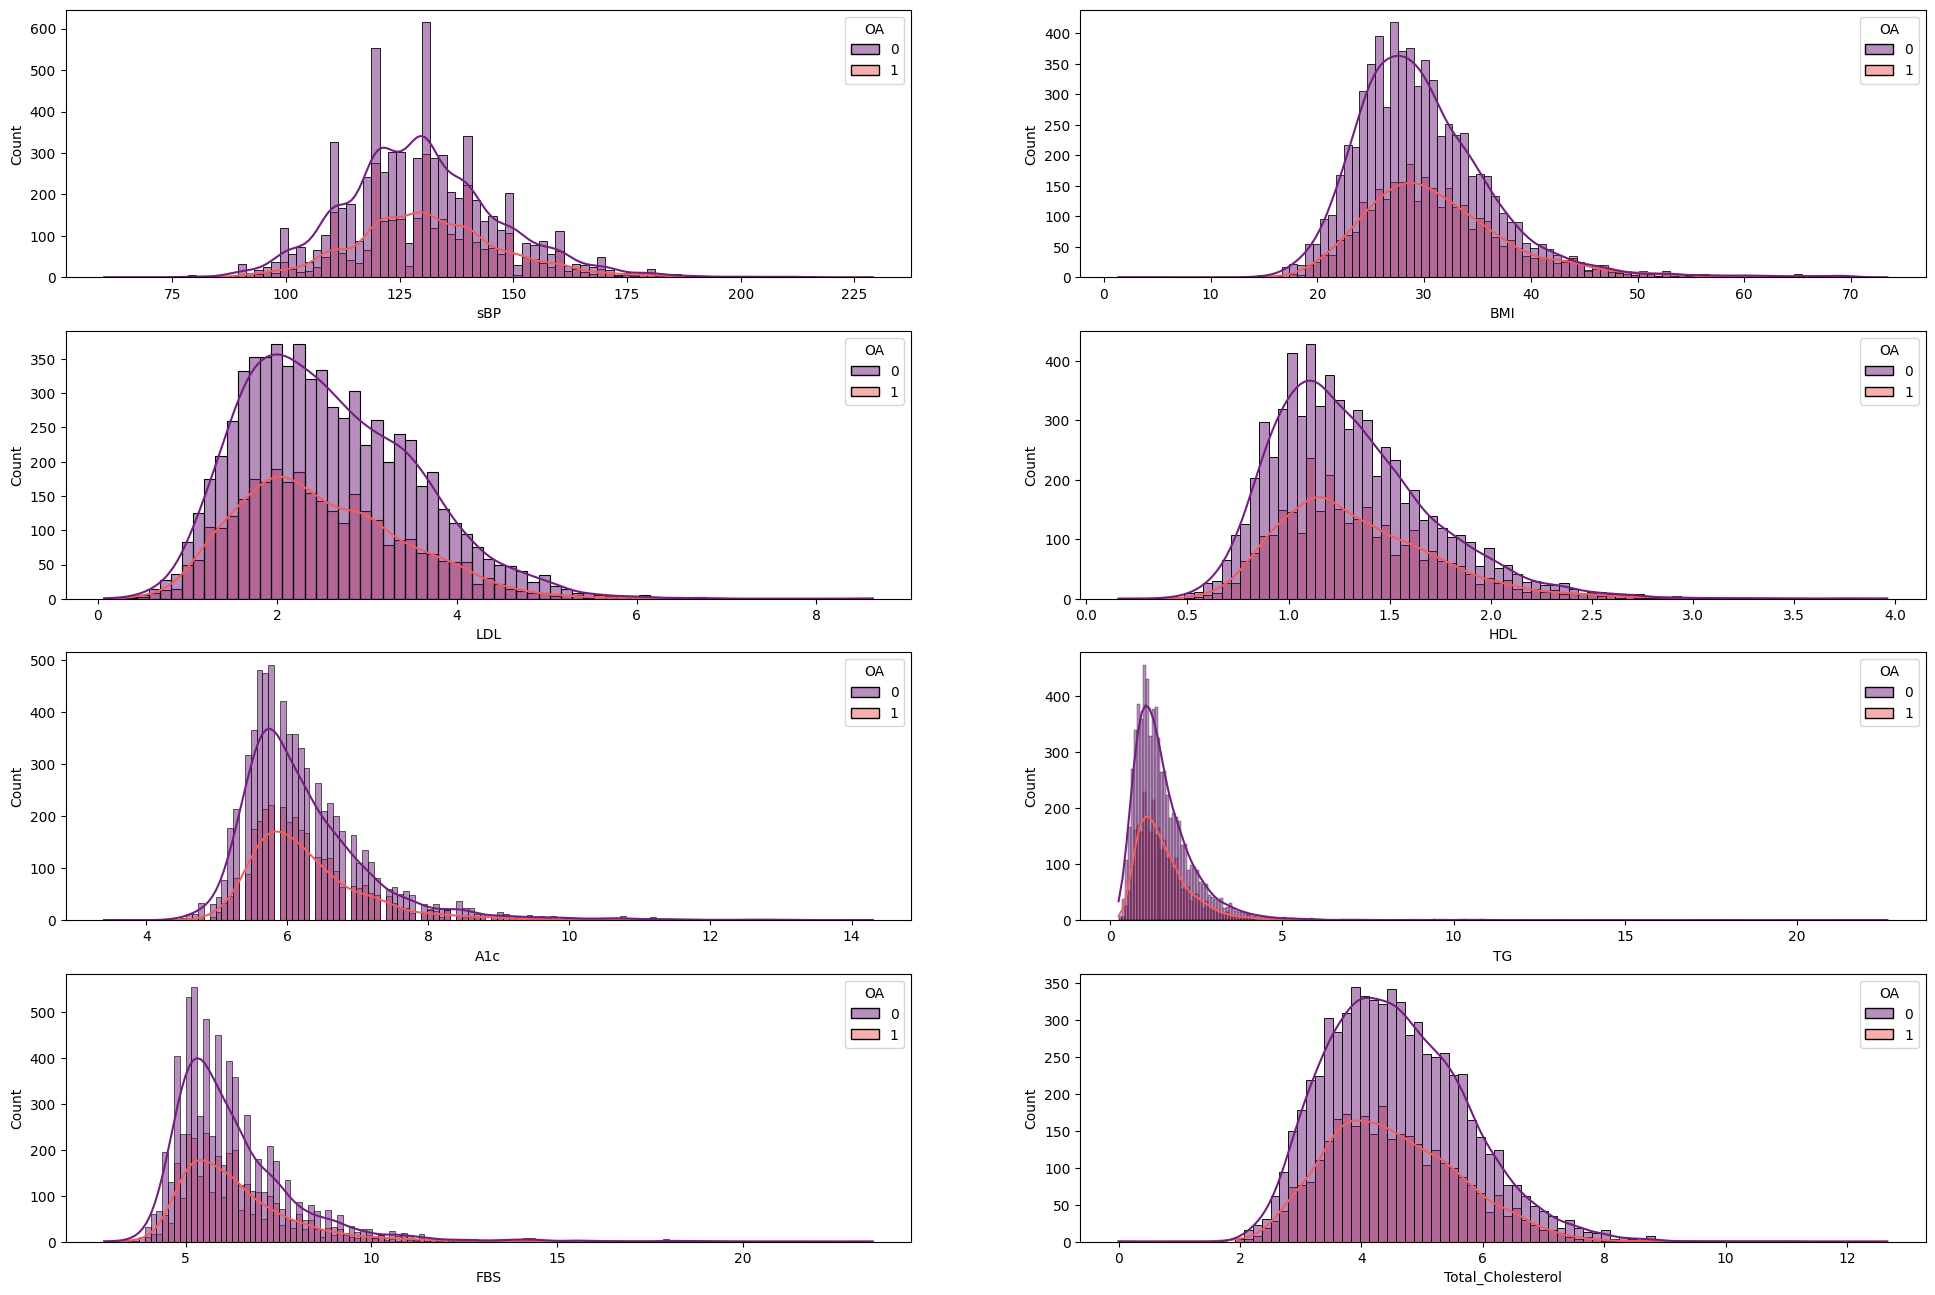

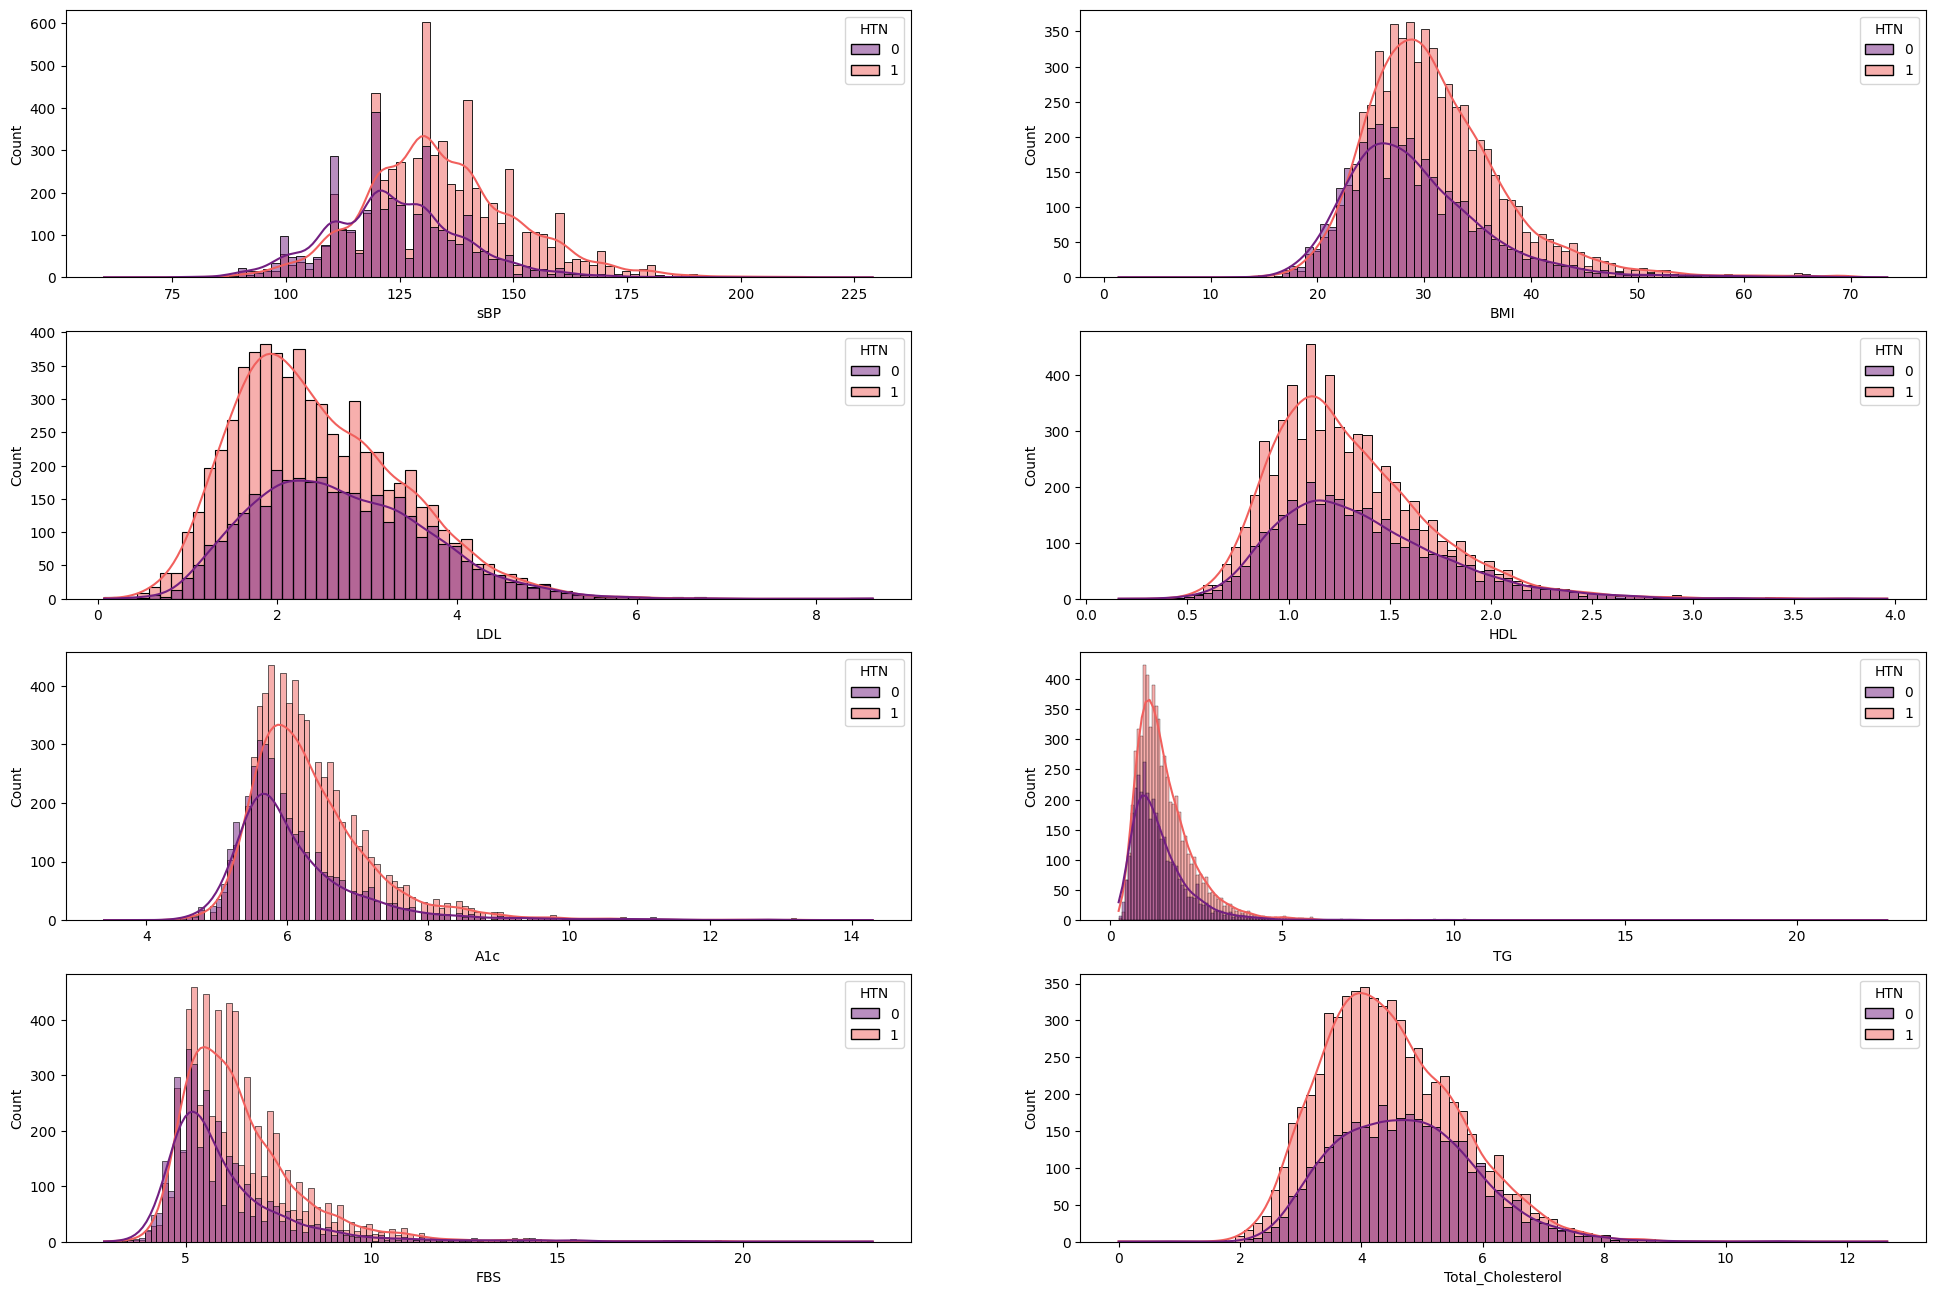

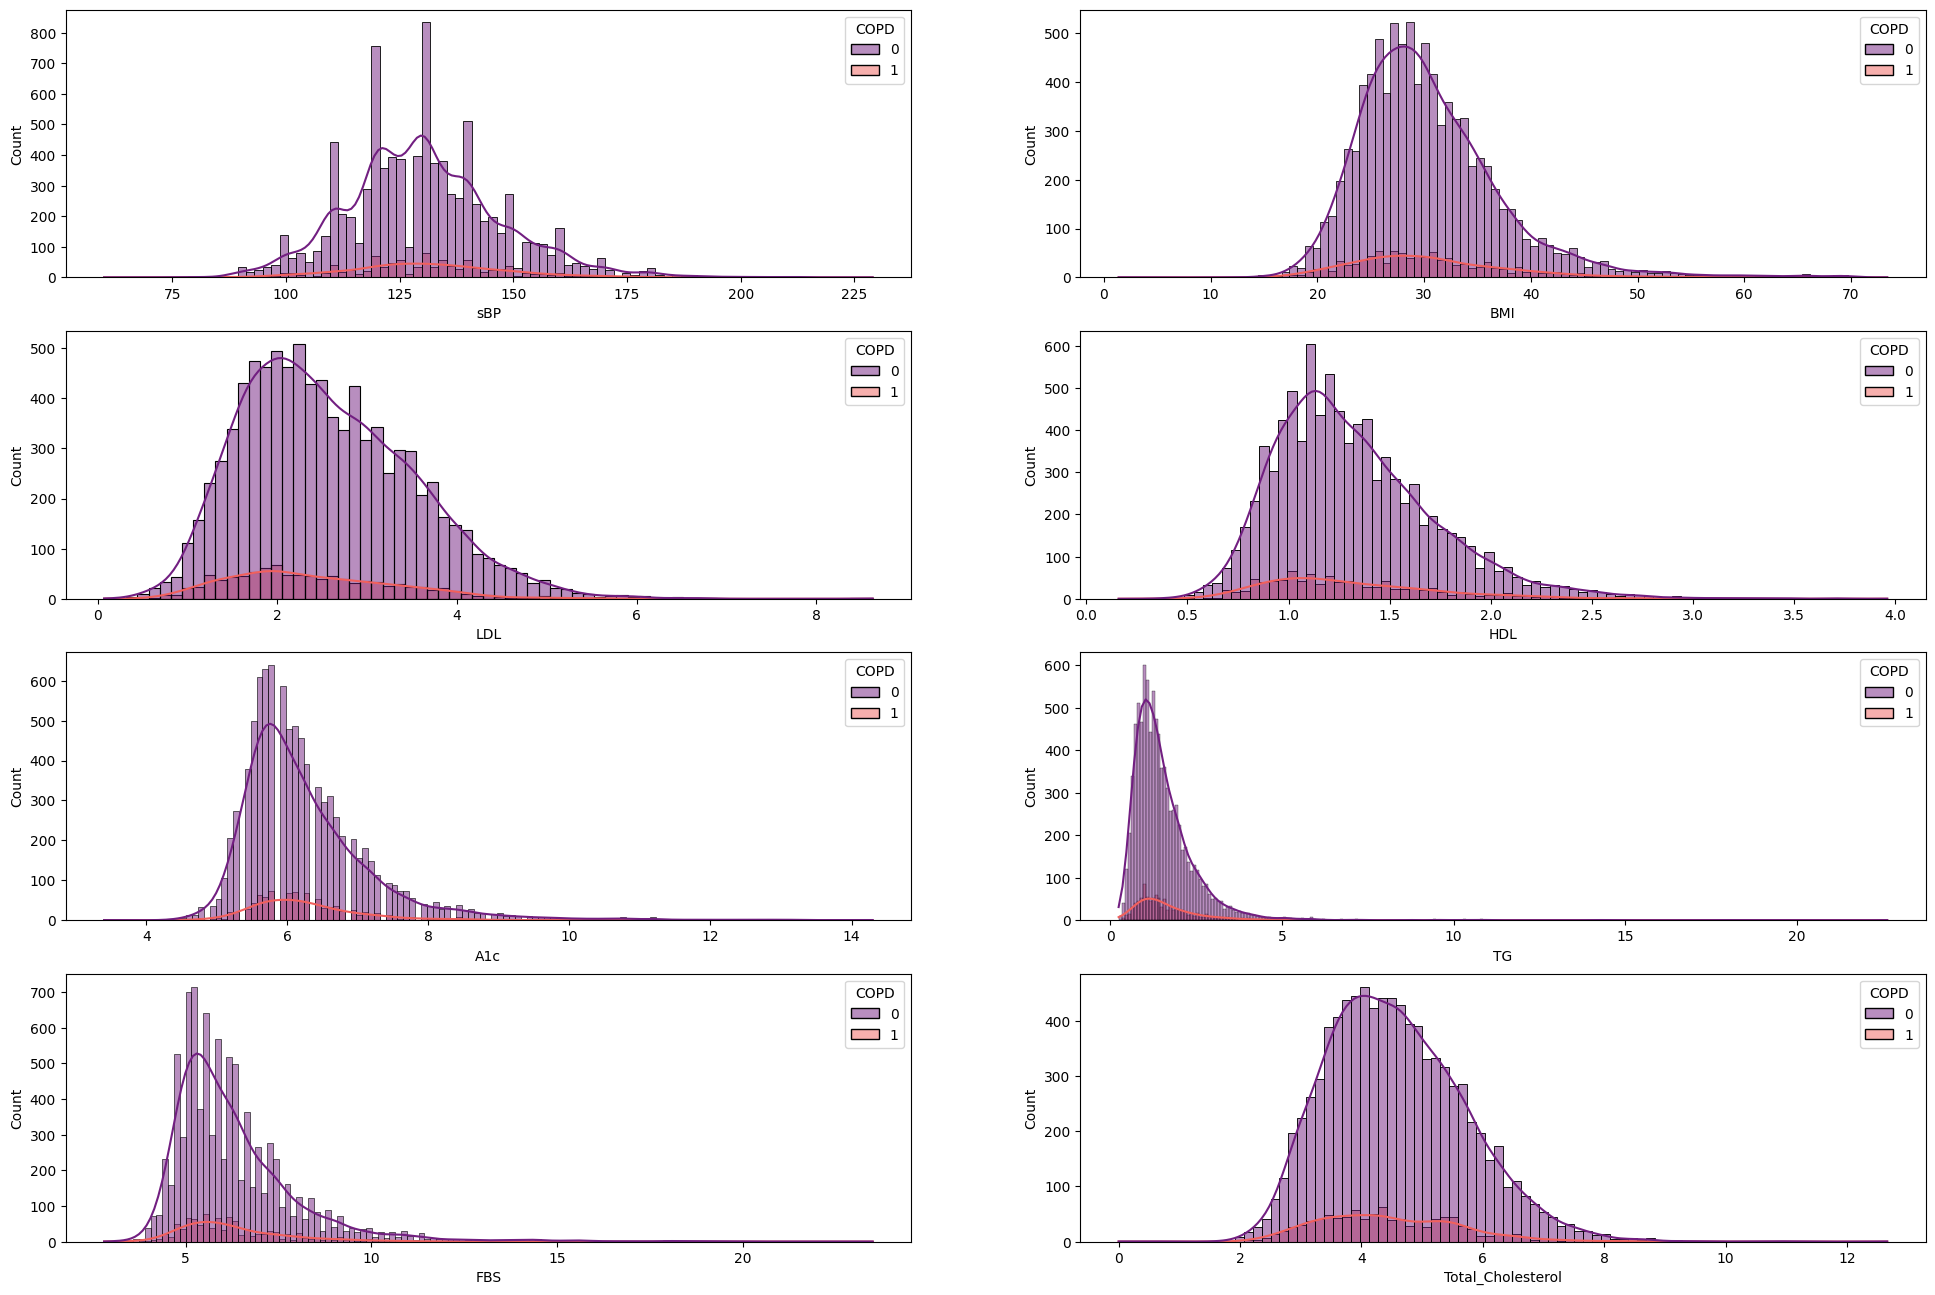

In [ ]:
for j in diagnosis:
  fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(24, 16))
  # Loop over each feature in numerical and multinomial lists
  for i, column in enumerate(numerical_columns):
      # Calculate the position for the subplot; x is the row index and y is the column index
      x = i // 2
      y = i % 2

      # Plot a histogram of the feature split by the 'target' class
      # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
      sns.histplot(dfDiag, x=column, hue=j, kde=True, palette='magma', ax=axs[x][y],)

  # Display all the subplots
  plt.show()

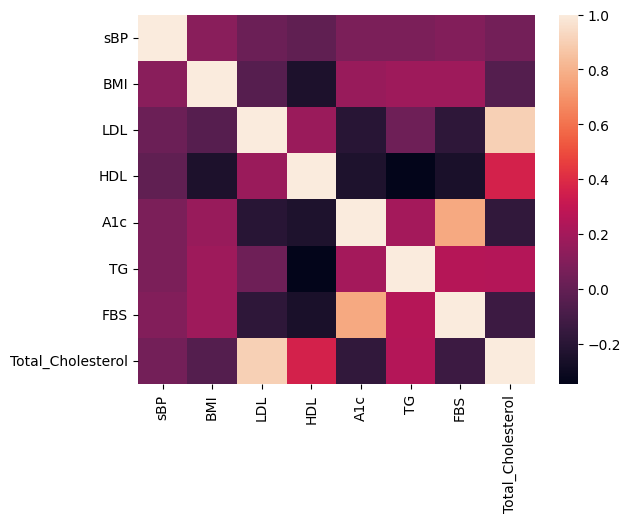

In [ ]:
sns.heatmap(df[['sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'Total_Cholesterol']].corr())
plt.show()

# Handling Missing Data

In [ ]:
print("Missing Value Distribution:\n",df.isnull().sum(),"\n" )

Missing Value Distribution:
 sBP                    4
BMI                    0
LDL                   61
HDL                   72
A1c                    0
TG                    53
FBS                    0
Total_Cholesterol    207
Diabetes               0
dtype: int64 



### Check if MCAR or MAR

1. Add missing indicator where $1 \implies$ missing and $0 \implies$ not missing for each column with missing values
2. Create new dataframe with all indicators and biomakers
3. Create dataframe for each biomarker with missing data
4. Run a logistic regression for each missing indicator to see what variables are significantly associated with the missingness

**Step 1**

In [ ]:
cols = ['sBP','LDL','HDL', 'TG', 'Total_Cholesterol']
df_missing_indicator = df[cols].isnull().astype(int).add_suffix('_indicator')

**Step 2**

In [ ]:
df_with_indicator = pd.concat([df, df_missing_indicator], axis=1)
df_with_indicator.head()

sBP        BMI   LDL   HDL  A1c    TG  FBS  Total_Cholesterol  Diabetes  \
0  126.0  31.000000  1.66  1.11  5.4  2.28  5.8               3.81         0   
1  135.0  25.846483  2.49  1.37  5.8  1.37  5.4               4.48         0   
2  133.0  30.900000  1.65   NaN  6.1  0.76  5.6                NaN         0   
3  136.0  56.710775  2.80  1.94  6.0  0.99  6.0               5.19         0   
4  123.0  33.067867  2.48  1.17  5.8  1.04  5.2               4.12         0   

   sBP_indicator  LDL_indicator  HDL_indicator  TG_indicator  \
0              0              0              0             0   
1              0              0              0             0   
2              0              0              1             0   
3              0              0              0             0   
4              0              0              0             0   

   Total_Cholesterol_indicator  
0                            0  
1                            0  
2                            1  
3                            0  
4                            0

**Step 3**

In [ ]:
df_sbp = df_with_indicator.drop(['sBP','LDL_indicator', 'HDL_indicator','TG_indicator', 'Total_Cholesterol_indicator'], axis=1, inplace=False).dropna()
df_ldl = df_with_indicator.drop(['LDL', 'sBP_indicator', 'HDL_indicator','TG_indicator', 'Total_Cholesterol_indicator'], axis=1, inplace=False).dropna()
df_HDL = df_with_indicator.drop(['HDL', 'sBP_indicator', 'LDL_indicator','TG_indicator', 'Total_Cholesterol_indicator'], axis=1, inplace=False).dropna()
df_TG = df_with_indicator.drop(['TG', 'sBP_indicator', 'LDL_indicator','HDL_indicator', 'Total_Cholesterol_indicator'], axis=1, inplace=False).dropna()
df_tc = df_with_indicator.drop(['Total_Cholesterol', 'sBP_indicator', 'LDL_indicator','HDL_indicator', 'TG_indicator'], axis=1, inplace=False).dropna()

**Step 4**

In [ ]:
#Sbp
X = df_sbp.drop('sBP_indicator', axis=1, inplace=False)
y = df_sbp['sBP_indicator']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.003143
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:          sBP_indicator   No. Observations:                 9648
Model:                          Logit   Df Residuals:                     9639
Method:                           MLE   Df Model:                            8
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.1375
Time:                        19:51:25   Log-Likelihood:                -30.319
converged:                       True   LL-Null:                       -35.152
Covariance Type:            nonrobust   LLR p-value:                    0.2893
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.2281      6.244      0.677      0.498      -8.011      16.467
BMI    

No signifcant values $\implies$ MCAR. Can drop missing data

In [ ]:
#LDL
X = df_ldl.drop('LDL_indicator', axis=1, inplace=False)
y = df_ldl['LDL_indicator']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.027644
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          LDL_indicator   No. Observations:                 9694
Model:                          Logit   Df Residuals:                     9685
Method:                           MLE   Df Model:                            8
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.1445
Time:                        19:51:30   Log-Likelihood:                -267.98
converged:                       True   LL-Null:                       -313.23
Covariance Type:            nonrobust   LLR p-value:                 3.681e-16
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.2170      1.733     -1.279      0.201      -5.614       1.180
sBP    

Signifcant values $\implies$ MAR. Must impute missingness

In [ ]:
#HDL
X = df_HDL.drop('HDL_indicator', axis=1, inplace=False)
y = df_HDL['HDL_indicator']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.033839
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          HDL_indicator   No. Observations:                 9699
Model:                          Logit   Df Residuals:                     9690
Method:                           MLE   Df Model:                            8
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                 0.03279
Time:                        19:51:34   Log-Likelihood:                -328.20
converged:                       True   LL-Null:                       -339.33
Covariance Type:            nonrobust   LLR p-value:                  0.004473
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4153      2.048     -1.179      0.238      -6.429       1.598
sBP    

No signifcant values $\implies$ MCAR. Can drop missing data

In [ ]:
#TG
X = df_TG.drop('TG_indicator', axis=1, inplace=False)
y = df_TG['TG_indicator']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.023873
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:           TG_indicator   No. Observations:                 9681
Model:                          Logit   Df Residuals:                     9672
Method:                           MLE   Df Model:                            8
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                 0.04854
Time:                        19:51:36   Log-Likelihood:                -231.12
converged:                       True   LL-Null:                       -242.91
Covariance Type:            nonrobust   LLR p-value:                  0.002691
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.7845      2.336     -2.049      0.041      -9.362      -0.207
sBP    

Signifcant values $\implies$ MAR. Must impute missingness

In [ ]:
#TC
X = df_tc.drop('Total_Cholesterol_indicator', axis=1, inplace=False)
y = df_tc['Total_Cholesterol_indicator']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.091972
         Iterations 8
                                Logit Regression Results                               
Dep. Variable:     Total_Cholesterol_indicator   No. Observations:                 9830
Model:                                   Logit   Df Residuals:                     9821
Method:                                    MLE   Df Model:                            8
Date:                         Tue, 31 Oct 2023   Pseudo R-squ.:                 0.01962
Time:                                 19:51:39   Log-Likelihood:                -904.08
converged:                                True   LL-Null:                       -922.17
Covariance Type:                     nonrobust   LLR p-value:                 1.626e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0613      0.963    

Signifcant values $\implies$ MAR. Must impute missingness

### Impute Missing Data

Data is imputed in the Random Forest Model since we only impute based on the `train` data

# Random Forest Model

Extra necessary functions

In [ ]:
def confusionPlot(classes, y_test, y_pred):
  # Plotting the confusion matrix
  plt.figure(figsize=(7,5))
  sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples',
              annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  return plt

def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

Model

In [ ]:
# Look at records with missing MCAR Data
null_data_sBP = df[df['sBP'].isnull()]
null_data_HDL = df[df['HDL'].isnull()]

# Drop records with missing sBP since MCAR
df = df[df['sBP'].notnull()]

# Drop records with ONLY HDL missing, since HDL is MCAR.
mask = df['HDL'].isnull() & df.drop('HDL', axis=1).notnull().all(axis=1)
df = df[~mask]

In [ ]:
df.head()

sBP        BMI   LDL   HDL  A1c    TG  FBS  Total_Cholesterol  Diabetes
0  126.0  31.000000  1.66  1.11  5.4  2.28  5.8               3.81         0
1  135.0  25.846483  2.49  1.37  5.8  1.37  5.4               4.48         0
2  133.0  30.900000  1.65   NaN  6.1  0.76  5.6                NaN         0
3  136.0  56.710775  2.80  1.94  6.0  0.99  6.0               5.19         0
4  123.0  33.067867  2.48  1.17  5.8  1.04  5.2               4.12         0

In [ ]:
data = df

data_x = data.drop('Diabetes', axis=1)
data_y = data['Diabetes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
# The criterion 'entropy' measures the quality of a split by how mixed the classes are in two groups
# class_weight 'balanced_subsample' is used to handle imbalanced classes. It computes weights based on the bootstrap sample for every tree grown.
# oob_score is set to True to use out-of-bag samples to estimate the generalization accuracy
random_forest = RandomForestClassifier(criterion='entropy', class_weight='balanced_subsample', oob_score=True)

# Creating a pipeline which first applies the column transformer preprocessing, then fits the Random Forest model
model = Pipeline([
    ("imputer", IterativeImputer(max_iter=10, random_state=0)),
    ('random_forest', random_forest)
])

# Display the pipeline architecture
model

Pipeline(steps=[('imputer', IterativeImputer(random_state=0)),
                ('random_forest',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        criterion='entropy', oob_score=True))])

In [ ]:
# Setting hyperparameters for Random Forest for the Grid Search.
param_dist = {
    "random_forest__n_estimators" : [100, 200],
    "random_forest__max_depth" : [5, 10, 15, None],
    "random_forest__min_samples_leaf" : [15, 20 ,25, None],
    "random_forest__max_features" : ['sqrt']
}

# Initializing stratified K-fold cross-validation. This ensures each fold has the same proportion of target labels as the whole dataset.
skf = StratifiedKFold(n_splits=5)

# Setting up GridSearchCV to search through the parameter space.
# It will evaluate the model for each combination of hyperparameters provided using stratified K-fold cross-validation.
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)

# Running the GridSearchCV on the training data.
random_search.fit(X_train, y_train)

# Extracting the results of the Grid Search into a DataFrame for analysis.
results = pd.DataFrame(random_search.cv_results_)

# Filtering to get the rows with the best performing hyperparameters.
results[results['rank_test_score'] == 1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8       1.435526      0.168995         0.031319        0.004597   

  param_random_forest__max_depth param_random_forest__max_features  \
8                             10                              sqrt   

  param_random_forest__min_samples_leaf param_random_forest__n_estimators  \
8                                    15                               100   

                                              params  split0_test_score  \
8  {'random_forest__max_depth': 10, 'random_fores...            0.86675   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
8           0.852294           0.867925           0.877987           0.857862   

   mean_test_score  std_test_score  rank_test_score  
8         0.864564        0.008851                1

In [ ]:
classes = df['Diabetes'].unique()

# Updating the model's hyperparameters with the best parameters identified from the Grid Search.
model = model.set_params(**random_search.best_params_)

# Retraining the model with the updated hyperparameters on the training data.
model = model.fit(X_train, y_train)

In [ ]:
# Predicting the target variable on the train and test sets
y_trainPred = model.predict(X_train)
y_testPred = model.predict(X_test)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_testPred, y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_trainPred, y_train)

======== Training Set ==========
AUC :  0.8866780123390521
Accuracy :  0.8854376257545271
Confusion Matrix:
[[3528  601]
 [ 310 3513]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      4129
           1       0.85      0.92      0.89      3823

    accuracy                           0.89      7952
   macro avg       0.89      0.89      0.89      7952
weighted avg       0.89      0.89      0.89      7952



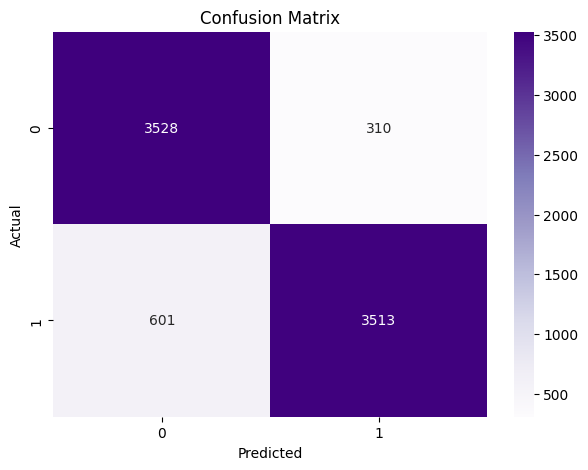

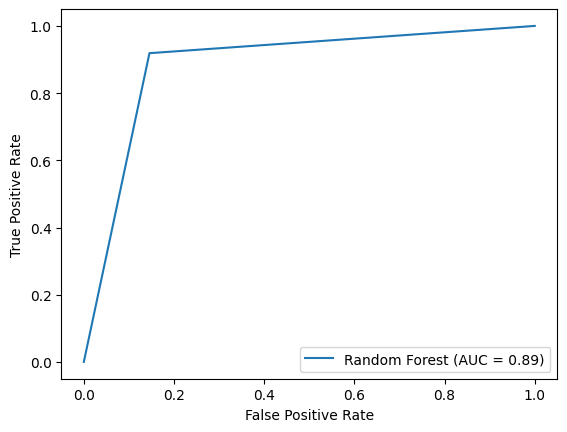

In [ ]:
# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)
confusionPlot(classes, y_train, y_trainPred).show()
# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_trainPred, y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot()

======== Test Set ==========
AUC :  0.8521741640986367
Accuracy :  0.8511814982403217
Confusion Matrix:
[[861 177]
 [119 832]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1038
           1       0.82      0.87      0.85       951

    accuracy                           0.85      1989
   macro avg       0.85      0.85      0.85      1989
weighted avg       0.85      0.85      0.85      1989



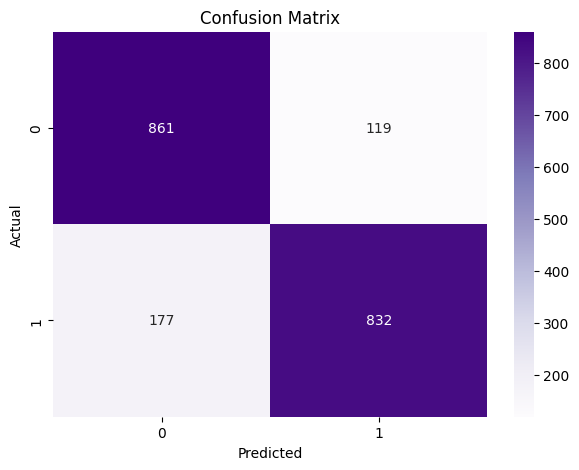

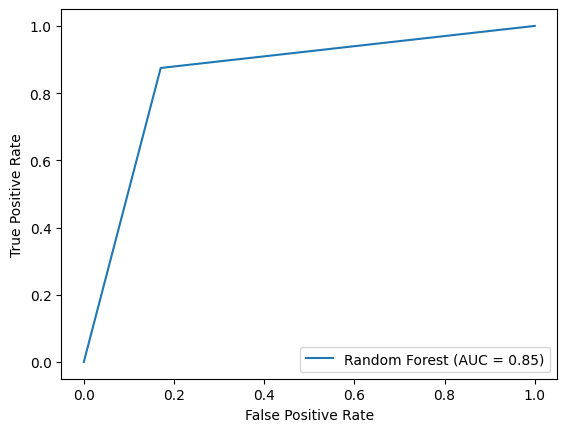

In [ ]:
# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)
confusionPlot(classes, y_test, y_testPred).show()
# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_testPred, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot()

Check whcih features are most inmportant in prediction

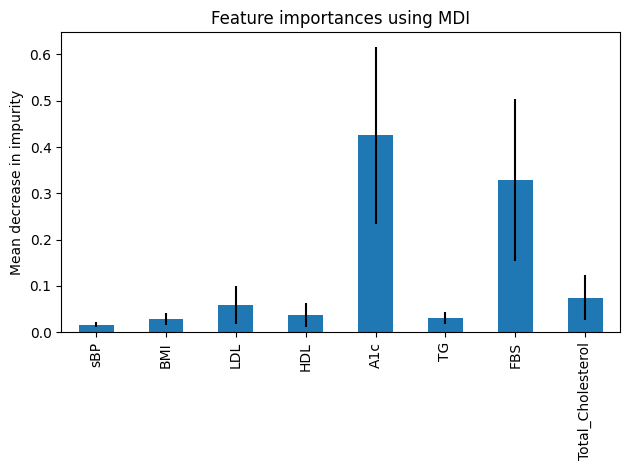

In [ ]:
importances = model.steps[1][1].feature_importances_
std = np.std([tree.feature_importances_ for tree in model.steps[1][1].estimators_], axis=0)

forest_importances = pd.Series(importances, index=numerical_columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()